Data Import

In [2]:
#import facebook
import requests
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
conversion_data = pd.read_csv('KAG_conversion_data.csv')   
conversion_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
# checking for types/irregularities 
conversion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
# there are as many ad ids as observations and can therefore be dropped. Did the same fore FB campaign ids
conversion_data.drop(['ad_id'], axis = 1, inplace = True)
conversion_data.drop(['fb_campaign_id'], axis = 1, inplace = True)
conversion_data

,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,916,30-34,M,15,7350,1,1.430000,2,1
1,916,30-34,M,16,17861,2,1.820000,2,0
2,916,30-34,M,20,693,0,0.000000,1,0
3,916,30-34,M,28,4259,1,1.250000,1,0
4,916,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...
1138,1178,45-49,F,109,1129773,252,358.189997,13,2
1139,1178,45-49,F,110,637549,120,173.880003,3,0
1140,1178,45-49,F,111,151531,28,40.289999,2,0
1141,1178,45-49,F,113,790253,135,198.710001,8,2


In [20]:
spent = conversion_data['Spent'].sum()
spent

213434828

In [21]:
Impressions = conversion_data['Impressions'].sum()
Impression

58705.229958205004

38165

Gender

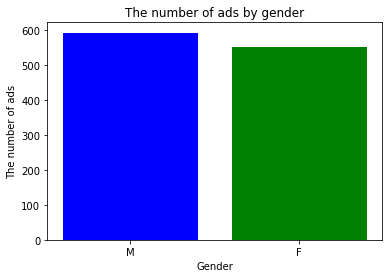

In [6]:
gender = conversion_data['gender'].value_counts()
plt.bar(gender.index.values,gender.values,  color=['blue','green'])
plt.xlabel('Gender')
plt.ylabel('The number of ads')
plt.title('The number of ads by gender')
plt.show();

In [7]:
gender = conversion_data['gender'].value_counts()
gender

M    592
F    551
Name: gender, dtype: int64

Age

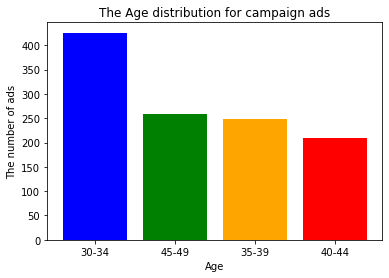

In [8]:
ages = conversion_data['age'].value_counts()
plt.bar(ages.index.values,ages.values, color=['blue','green','orange','red'])
plt.xlabel('Age')
plt.ylabel('The number of ads')
plt.title('The Age distribution for campaign ads')
plt.show();

In [9]:
ages = conversion_data['age'].value_counts()
ages.values

array([426, 259, 248, 210], dtype=int64)

Campaign Ads

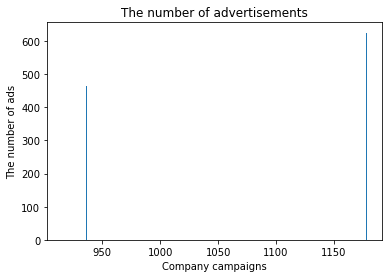

In [10]:
# looking to see viewers are being exposed to the same campaigns
ad_campaigns = conversion_data['xyz_campaign_id'].value_counts()
plt.bar(ad_campaigns.index.values, ad_campaigns.values)
plt.xlabel('Company campaigns')
plt.ylabel('The number of ads')
plt.title('The number of advertisements')
plt.show();

In [25]:
# total number of clicks
clicks = conversion_data['Clicks'].sum()
clicks

38165

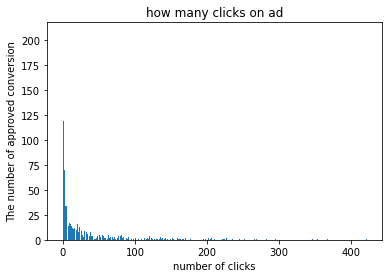

In [11]:
#  Clicks: number of clicks on for that ad.
clicks = conversion_data['Clicks'].value_counts()
plt.bar(clicks.index.values, clicks.values)
plt.xlabel('number of clicks')
plt.ylabel('The number of approved convedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEWCAYAAACJ0YulAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAiDklEQVR4nO3deZwdVZ338c+XXTZlCQxbDCDiIEKQFhhBZXNAQEAEBB8QhDEwgoLoOICouM34MC7zuDIBEVRkUUCCIIrI4qgsSUBWoywBIjEJoBBRAgnf54863Vya7tvVy7230/19v173datO1anz6wr0r6tO1TmyTUREBMAynQ4gIiJGjySFiIjokaQQERE9khQiIqJHkkJERPRIUoiIiB5JCjFiJM2WtHun4xjNGs+RpFMlnV2jzrmSPtv66Foj/10sXZbrdAAR45Xt/+h0DBG95UohIiJ6JCnESJss6Q5JT0q6SNJK3RskvU/SfZKekDRN0vql/FOSvlqWl5f0tKQzyvrLJD0jaY3eDUnaWdIcSR+VNF/SXEn7S9pL0u9LO6c27L+dpN9I+kvZ92uSVmjYbknHSvqDpD9L+roqK5Zjva5h33Uk/V3ShL5OQvlZ75W0UNI9kl7fxz6nS/pew/pOkn5d4ntE0pF91FlN0nWSvlJi26scf6GkP0r6SD/xLCPpNEkPlXP1HUkvL9smlZ/9CEkPS3pM0sf6Ok7Zf29Jt0l6qsR5eq/th5d2Hm92nBidkhRipB0M7AlsDGwFHAkgaVfgP8v29YCHgAtLnRuAncvyG4A/AW8p6/8EzLL9537a+wdgJWAD4BPAWcBhwLbAm4BPSNqk7LsE+BCwdjnubsD7ex1vnxLD1iXWPWwvKrEe1rDfocDPbS/oHZCkg4DTgfcAqwP7Ao/3E393nYnAT4CvAhOAycDtvfZZC7gW+JXtD7oao+ZbwDG2VwO2BH7RTxNHls8uwCbAqsDXeu2zE7A51Xn5hKR/7OdYT5ef7RXA3sC/Stq/xLgF8E3gcGB9YC1gw2Y/e4wytvPJZ0Q+wGzgsIb1M4Azy/K3gDMatq0KPAdMAl4GPEP1C+Rk4FRgTtnnU8BX+mlvZ+DvwLJlfTXAwPYN+8wA9u+n/onAZQ3rBnZqWL8YOLksbw88AixT1qcDB/dz3J8CJzQ5R7uX5dOB75XlUxpj6VXnXOAc4C7g33ptexg4Blh9gH+ba4H3N6xvXs7/cuXfwMCGDdtvAQ6p+e/+38CXy/IngAsbtq0CPNv9M+cz+j+5UoiR9qeG5b9R/WKH6q/Gh7o32P4r1V/PG9j+O9Uv2bcAb6a6cvg1sGMpu6FJe4/bXlKW/16+5zVs/3t3DJJeLenHkv4k6SngP6iuGgaM3/bNVH8hv0XSa4BXAdP6iWkj4P4mMQ+lzt5UyfPMXuXvBPYCHpJ0g6R/6qf+i85/WV4OWLehrL9/uxeRtH25hbVA0pPAsbxwHtenSp4A2H6aAa6SYnRJUoh2eRR4ZfeKpFWorgz+WIpuAHYFtgFuLet7ANsBN45QDN8EfgdsZnt1qisSDaL+eVS3kA4Hfmj7mX72ewTYdJCxDVTnLOBq4Kpy7gCwfavt/YB1gB9RXd305UXnH5gILObFCbSu71MlxI1sv5wqUXWfx7lUCQ4ASStT/TvHUiJJIdrl+8B7JU2WtCLVX+k3255dtt9AdZ/6HtvPAtcD/wI86D7u2w/RasBTwF/LX/v/Osj63wXeQZUYvtNkv7OBj0jatnQGv0rSK5vsD3A+sLukgyUtJ2ktSZN77XM8MAv4cemAX0HS/5H0ctvPlZ9tCX27APiQpI0lrUp1/i+yvXiAuPqyGvCE7WckbQe8u2HbD4F9Sqf5CsCnye+ZpUr+saItbF8LfBy4hOqvyU2BQxp2+TXV7ZHuq4J7qPoZRuoqAeAjVL/AFlL95X3RYCrbngPMpLr//ssm+/0A+BxVIlxI9Rf8mgMc+2Gq20AfBp6g6mTeutc+BqZQXVVcTtXBfjgwu9wOO5YXd4Y3Oocqqd0IPEh1bj/QLKYm3g98WtJCqj6EnqsT23cDx1H97HOBP1P1D8VSQtV/ZxFRh6RzgEdtn9bpWCJaIW80R9QkaRJwAFW/R8SYlNtHETVI+gzVI6H/ZfvBTscT0Sq5fRQRET1ypRARET2W6j6Ftdde25MmTep0GBERS5UZM2Y8ZrvPcbuW6qQwadIkpk+f3ukwIiKWKpIe6m9bbh9FRESPJIWIiOiRpBARET2SFCIiokeSQkRE9EhSiIiIHkkKERHRI0khIiJ6JClERESPJIWIiOiRpBARET2SFCIiokeSQkRE9GhZUpC0kaTrJN0r6W5JJ5TyNSVdI+kP5XuNhjqnSLpP0ixJe7QqtoiI6FsrrxQWAx+2/Y/ADsBxkrYATgautb0ZcG1Zp2w7BHgtsCfwDUnLtjC+iIjopWVJwfZc2zPL8kLgXmADYD/gvLLbecD+ZXk/4ELbi8ocuPcB27UqvoiIeKm29ClImgRsA9wMrGt7LlSJA1in7LYB8EhDtTmlrPexpkiaLmn6ggULWhp3RMR40/KkIGlV4BLgRNtPNdu1jzK/pMCearvLdteECX3OJhcREUPU0qQgaXmqhHC+7UtL8TxJ65Xt6wHzS/kcYKOG6hsCj7YyvoiIeLEBk4KkA8qTQk9KekrSQknN/uLvrifgW8C9tr/UsGkacERZPgK4vKH8EEkrStoY2Ay4ZTA/TEREDM9yNfY5A3i77XsHeewdgcOBOyXdXspOBT4PXCzpaOBh4CAA23dLuhi4h+rJpeNsLxlkmxERMQx1ksK8ISQEbP8vffcTAOzWT53PAZ8bbFsRETEy6iSF6ZIuAn4ELOoubOgjiIiIMaJOUlgd+Bvwzw1lBpIUIiLGmAGTgu33tiOQiIjovDpPH20o6TJJ8yXNk3SJpA3bEVxERLRXnfcUvk31uOj6VG8YX1HKIiJijKmTFCbY/rbtxeVzLpBXiSMixqA6SeExSYdJWrZ8DgMeb3VgERHRfnWSwlHAwcCfgLnAgaUsIiLGmDpPHz0M7NuGWCIiosP6TQqSPmr7DElfpe/RSj/Y0sgiIqLtml0pdA9tMb0dgUREROf1mxRsX1G+u2dJQ9IywKoDzIsQERFLqTovr31f0uqSVqEawXSWpH9rfWgREdFudZ4+2qJcGewPXAVMpBoSOyIixpg6SWH5MoPa/sDltp+jj47niIhY+tVJCmcCs4FVgBslvRJIn0JExBjU9D2F0rE8z/YGDWUPA7sMdGBJ5wD7APNtb1nKLgI2L7u8AviL7cmSJlE97TSrbLvJ9rGD+1EiImK4miYF289LOh64uKHMVNNlDuRc4GvAdxrqvqt7WdIXgScb9r/f9uRaUUdEREvUuX10jaSPSNpI0prdn4Eq2b4ReKKvbZJENXTGBYMLNyIiWqnOzGvd4xwd11BmYJNhtPsmqttSf2go21jSbVT9FafZ/mVfFSVNAaYATJw4cRghREREb3XGPtq4Be0eyouvEuYCE20/Lmlb4EeSXtvXS3K2pwJTAbq6uvIUVETECKrz8trKkk6TNLWsbyZpn6E2KGk54ADgou4y24tsP16WZwD3A68eahsRETE0dWdeexZ4Y1mfA3x2GG3uDvzO9pzuAkkTJC1bljcBNgMeGEYbERExBHWSwqa2zwCeA7D9d0ADVZJ0AfAbYHNJcyQdXTYdwks7mN8M3CHpt8APgWNt99lJHRERrVOno/lZSS+jvMUsaVNg0UCVbB/aT/mRfZRdAlxSI5aIiGihOknhdOBqYCNJ5wM7Ake2MKaIiOiQOk8f/UzSDGAHqttGJ9h+rOWRRURE2w2YFCRNo+oDmGb76daHFBERnVKno/mLVC+b3SPpB5IOlLRSi+OKiIgOqHP76AbghvLI6K7A+4BzgNVbHFtERLRZnY5mytNHbwfeBbweOK95jYiIWBrV6VO4CNie6gmkrwPX236+1YFFRET71blS+DbwbttLWh1MRER0Vp0+haslvbFMhLNcQ/l3+q8VERFLozq3j74LbArcDnRfLZiGyXMiImJsqHP7qAvYosy4FhERY1id9xTuAv6h1YFERETn1blSWJvqxbVbaBgIz/a+LYsqIiI6ou6AeBERMQ7UeqNZ0rrAG0rRLbbntzasiIjohDrTcR4M3AIcBBwM3CzpwFYHFhER7Veno/ljwBtsH2H7PcB2wMcHqiTpHEnzJd3VUHa6pD9Kur189mrYdoqk+yTNkrTHUH6YiIgYnjpJYZlet4ser1nvXGDPPsq/bHty+VwFIGkLqmk6X1vqfKN7zuaIiGifOh3NV0v6KS/Mq/wu4CcDVbJ9Y3kLuo79gAttLwIelHQf1RXJb2rWj4iIETDgX/y2/w34H2ArYGtgqu2PDqPN4yXdUW4vrVHKNgAeadhnTil7CUlTJE2XNH3BggXDCCMiInqr09G8MXCV7ZNsf4jqymHSENv7JtWQGZOBuVQT+EA1zWdvfb5BbXuq7S7bXRMmTBhiGBER0Zc6fQM/ABqHyl5SygbN9jzbS8rQ22dR3SKC6spgo4ZdNwQeHUobERExdHWSwnK2n+1eKcsrDKUxSes1rL6DaggNgGnAIZJWLFcmm1E9BhsREW1Up6N5gaR9bU8DkLQf8NhAlSRdAOwMrC1pDvBJYGdJk6luDc0GjgGwfbeki4F7gMXAcZm/ISKi/TTQ4KeSNgXOB9YvRXOAw23f3+LYBtTV1eXp06d3OoyIiKWKpBm2u/raVmeYi/uBHSStSpVEFo50gBERMTrUuX0EgO2/tjKQiIjovDodzRERMU4kKURERI9+bx9JOqBZRduXjnw4ERHRSc36FN5evtcB3gj8oqzvAlwPJClERIwx/SYF2+8FkPRjYAvbc8v6esDX2xNeRES0U50+hUndCaGYB7y6RfFEREQH1Xkk9fqGobNNNe/BdS2NKiIiOqLOy2vHS3oH8OZSNNX2Za0NKyIiOqHuy2szgYW2fy5pZUmr5c3miIixp858Cu8Dfkg10Q5Uk9/8qIUxRUREh9TpaD4O2BF4CsD2H6geU42IiDGmTlJY1DifgqTl6GdWtIiIWLrVSQo3SDoVeJmkt1LNunZFa8OKiIhOqJMUTgYWAHdSTYpzFXBaK4OKiIjOqPP00X7Ad2yfNZgDSzoH2AeYb3vLUvZfVMNnPAvcD7zX9l8kTQLuBWaV6jfZPnYw7UVExPDVuVLYF/i9pO9K2rv0KdRxLrBnr7JrgC1tbwX8HjilYdv9tieXTxJCREQHDJgUyhhIr6LqS3g3cL+ks2vUuxF4olfZz2wvLqs3ARsOOuKIiGiZWvMp2H4O+AlwITCD6pbScB1VjtltY0m3SbpB0pv6qyRpiqTpkqYvWLBgBMKIiIhudV5e21PSucB9wIHA2cB6w2lU0seAxcD5pWguMNH2NsBJwPclrd5XXdtTbXfZ7powYcJwwoiIiF7q9A8cSXWFcIztRcNtUNIRVB3Qu9k2QDnuorI8Q9L9VCOxTh9uexERUV+dAfEOkbQu8FZJALfYnj+UxiTtCfw78Bbbf2sonwA8YXuJpE2AzYAHhtJGREQMXZ3bRwcBtwAHAQcDN0s6sEa9C4DfAJtLmiPpaOBrwGrANZJul3Rm2f3NwB2Sfks1ztKxtp/o88AREdEyKndw+t+h+kX91u6rg/JX/c9tb92G+Jrq6ury9Om5wxQRMRiSZtju6mtbnaePlul1u+jxmvVGvUknX9npECIiRpU6Hc1XN8y8BvAuqqEuIiJijGmaFFT1LH8FeAOwEyAy81pExJjVNCnYtqQf2d4WuLRNMUVERIfU6Ru4SdIbWh5JRER0XJ0+hV2AYyXNBp6muoXkMqhdRESMIXWSwttaHkVERIwKdd5ofkjS66k6mg38yvbMlkcWERFtV+eN5k8A5wFrAWsD35aUmdciIsagOrePDgW2sf0MgKTPAzOBz7YysIiIaL86Tx/NBlZqWF+RairNiIgYY+pcKSwC7pZ0DVWfwluB/5X0FQDbH2xhfBER0UZ1ksJl5dPt+taEEhERnVbn6aPzJK0AvIbqSmGW7WdbHllERLTdgElB0l7A/1D1I4hqLuVjbP+kec2IiFja1Ll99CVgF9v3AUjaFLgSSFKIiBhj6jx9NL87IRQPAANOxynpHEnzJd3VULampGsk/aF8r9Gw7RRJ90maJWmPQf0UERExIuokhbslXSXpSElHAFcAt0o6QNIBTeqdC+zZq+xk4FrbmwHXlnUkbQEcAry21PmGpGUH96NERMRw1UkKKwHzgLcAOwMLgDWBtwP79FfJ9o1A73mW96N6O5ryvX9D+YW2F9l+ELgP2K7WTxARESOmztNH7x3B9ta1Pbccd66kdUr5BsBNDfvNKWUvIWkKMAVg4sSJIxhaRETUefpoJeBoqls7PW822z5qBONQH2Xua0fbU4GpAF1dXX3uExERQ1Pn9tF3gX8A9gBuADYEFg6xvXmS1gMo390d1nOAjRr22xB4dIhtRETEENVJCq+y/XHgadvnAXsDrxtie9OAI8ryEcDlDeWHSFpR0sbAZsAtQ2wjIiKGqM57Cs+V779I2hL4EzBpoEqSLqDqmF5b0hzgk8DngYslHQ08DBwEYPtuSRcD9wCLgeNsLxncjxIREcNVJylMLe8TnEb1F/2qwMcHqmT70H427dbP/p8DPlcjnoiIaJE6Tx+dXRZvBDZpbTgREdFJdfoUIiJinEhSiIiIHv0mBUkHle+N2xdORER0UrMrhVPK9yXtCCQiIjqvWUfz45Kuo5o/YVrvjbb3bV1YERHRCc2Swt7A66neaP5ie8KJiIhO6jcplCk3b5L0RtsLJK1WFfuv7QsvIiLaqc7TR+tKug24C7hH0ozyZnNERIwxdZLCVOAk26+0PRH4cCmLiIgxpk5SWMX2dd0rtq8HVmlZRBER0TF1xj56QNLHqTqcAQ4DHmxdSBER0Sl1rhSOAiYAl5bP2sBIzsYWERGjRJ0B8f4MfLANsURERIdl7KOIiOiRpBARET2aJgVJy0r60Eg2KGlzSbc3fJ6SdKKk0yX9saF8r5FsNyIiBtY0KZQpMfcbyQZtz7I92fZkYFvgb8BlZfOXu7fZvmok242IiIHVeST1V5K+BlwEPN1daHvmCLS/G3C/7YckjcDhIiJiOOokhTeW7083lBnYdQTaPwS4oGH9eEnvAaYDHy5PPr2IpCnAFICJEyeOQAgREdFtwI5m27v08Rl2QpC0ArAv8INS9E1gU2AyMJd+Rma1PdV2l+2uCRMmDDeMiIhoMGBSkLSupG9J+klZ30LS0SPQ9tuAmbbnAdieZ3uJ7eeBs4DtRqCNiIgYhDqPpJ4L/BRYv6z/HjhxBNo+lIZbR5LWa9j2DqpRWSMioo3qJIW1bV8MPA9gezGwZDiNSloZeCvVsBndzpB0p6Q7gF2AEX0UNiIiBlYnKTwtaS2qzmUk7QA8OZxGbf/N9lq2n2woO9z262xvZXtf23OH00Zdk06+sh3NREQsFeo8fXQSMA3YVNKvqAbHO7ClUUVEREfUGRBvpqS3AJsDAmbZfq7lkUVERNsNmBQkrQS8H9iJ6hbSLyWdafuZVgcXERHtVef20XeAhcBXy/qhVBPuHNSqoCIiojPqJIXNbW/dsH6dpN+2KqCIiOicOk8f3VaeOAJA0vbAr1oXUkREdEq/VwqS7qTqQ1geeI+kh8umicA9bYgtIiLarNnto33aFkVERIwK/SYF2w91L0taA9io1/4PvaRSREQs1eo8kvoZ4EjgfspbzYzc0NkRETGK1Hn66GBgU9vPtjqYiIjorDpPH90FvKLFcURExChQ50rhP6keS70LWNRdaHvflkUVEREdUScpnAf8X+BOyvDZERExNtVJCo/Z/krLI4mIiI6rkxRmSPpPquGzG28fzWxZVBER0RF1ksI25XuHhrJhPZIqaTbVIHtLgMW2uyStCVwETAJmAwfb/vNQ24iIiMGrM5/CLi1qexfbjzWsnwxca/vzkk4u6//eorYjIqIPdV5e+0Rf5bY/PcKx7AfsXJbPA64nSSEioq1qzdHc8FkCvI3qFs9wGPiZpBmSppSydbvnZS7f6/RVUdIUSdMlTV+wYMEww4iIiEZ1bh99sXFd0heoOp2HY0fbj0paB7hG0u/qVrQ9FZgK0NXV5QF2j4iIQahzpdDbysAmw2nU9qPlez5wGbAdME/SegDle/5w2oiIiMEbMClIulPSHeVzNzAL+H9DbVDSKpJW614G/plqKI1pwBFltyOAy4faRkREDE2dR1Ib51VYDMyzvXgYba4LXCapu/3v275a0q3AxZKOBh4mc0BHRLRdnT6FhyQtS/XLfDlgfUnYfniAqv0d7wFg6z7KHwd2G8oxIyJiZNR5JPUDwCeBebww9pGBrVoYV0REdECd20cnAJuXv+QjImIMq/P00SPAk60OJCIiOq/OlcIDwPWSruTFA+J9qWVRRURER9RJCg+XzwrlExERY1Sdp48+1Y5AIiKi84byRnNERIxRSQoREdEjSSEiInrUGfvo1ZKulXRXWd9K0mmtDy0iItqtzpXCWcApwHMAtu8ADmllUO026eQrmXTylZ0OIyKi4+okhZVt39KrbDgD4kVExChVJyk8JmlTqvGOkHQgMLelUUVEREfUeXntOKqZzl4j6Y/Ag8BhLY0qIiI6os7Law8Au5cJcZaxvbD1YUVERCfUGTp7ReCdwCRguTI5DrY/3dLIIiKi7er0KVwO7EfVufx0w2dIJG0k6TpJ90q6W9IJpfx0SX+UdHv57DXUNiIiYmjq9ClsaHvPEWxzMfBh2zPLXM0zJF1Ttn3Z9hdGsK2IiBiEOlcKv5b0upFq0PZc2zPL8kLgXmCDkTp+REQMXb9JQdJdku4AdgJmSpol6Q5Jd5byYZM0CdgGuLkUHV/aOEfSGv3UmSJpuqTpCxYsGIkwIiKiaHb7aANgcqsalrQqcAlwou2nJH0T+AzV+xCfAb4IHNW7nu2pVI/I0tXV5VbFFxExHjVLCg/afqgVjUpaniohnG/7UgDb8xq2nwX8uBVtR0RE/5olhXUkndTfxqFOx6nqmdZvAfc2HkPSera735R+B3DXUI4fERFD1ywpLAusCmiE29wROBy4U9LtpexU4FBJk6luH80GjhnhdiMiYgDNksLcVrygZvt/6TvRXDXSbUVExOA0eyR1pK8QIiJilGuWFHZrWxQRETEq9JsUbD/RzkBGk0y4ExHjVeZo7kezxJCkERFjVZJCRET0SFLopfEqIFcEETHeJCkMQ5JGRIw1SQoD6P7FnwQQEeNBkkINSQgRMV4kKQxSEkREjGVJCiMgndMRMVYkKQzRQL/8e29PsoiIpUGSQkRE9EhSaKFcHUTE0iZJYYSMRAKo0zcxlHaSnCKiriSFNmh816GvX9AjmQD6arPdkoQill6jLilI2lPSLEn3STq50/EMxkhfLdTZbzC//AeTkNql0+1HxIuNqqQgaVng68DbgC2opujcorNRtVadp5gG+yRTnV/+Q00izfYZzhNXdR/rHUpia2XiGanHkZMcY7QYVUkB2A64z/YDtp8FLgT263BMLdHfraSB6jQrH+7xmh1noF9+/dXt64qm2VXOYJcby3ofe6SHP697fuocv3e8A7VZd9tQrzTr7j/cfdptJM7RaNTK2GS7ZQcfLEkHAnva/peyfjiwve3jG/aZAkwpq5sDs4bR5NrAY8OoP9bl/DSX89Nczk9znTw/r7Q9oa8Ny7U7kgH0NS/0i7KW7anA1BFpTJpuu2skjjUW5fw0l/PTXM5Pc6P1/Iy220dzgI0a1jcEHu1QLBER485oSwq3AptJ2ljSCsAhwLQOxxQRMW6MqttHthdLOh74KbAscI7tu1vY5IjchhrDcn6ay/lpLuenuVF5fkZVR3NERHTWaLt9FBERHZSkEBERPcZlUliah9IYSZLOkTRf0l0NZWtKukbSH8r3Gg3bTinnbJakPToTdXtI2kjSdZLulXS3pBNKec4PIGklSbdI+m05P58q5Tk/DSQtK+k2ST8u66P+/Iy7pDAeh9Jo4lxgz15lJwPX2t4MuLasU87RIcBrS51vlHM5Vi0GPmz7H4EdgOPKOcj5qSwCdrW9NTAZ2FPSDuT89HYCcG/D+qg/P+MuKTCOhtIYiO0bgSd6Fe8HnFeWzwP2byi/0PYi2w8C91GdyzHJ9lzbM8vyQqr/sTcg5wcAV/5aVpcvH5Pz00PShsDewNkNxaP+/IzHpLAB8EjD+pxSFpV1bc+F6hcjsE4pH7fnTdIkYBvgZnJ+epRbI7cD84FrbOf8vNh/Ax8Fnm8oG/XnZzwmhQGH0og+jcvzJmlV4BLgRNtPNdu1j7IxfX5sL7E9mWrkge0kbdlk93F1fiTtA8y3PaNulT7KOnJ+xmNSyFAazc2TtB5A+Z5fysfdeZO0PFVCON/2paU456cX238Brqe6F57zU9kR2FfSbKpb1LtK+h5LwfkZj0khQ2k0Nw04oiwfAVzeUH6IpBUlbQxsBtzSgfjaQpKAbwH32v5Sw6acH0DSBEmvKMsvA3YHfkfODwC2T7G9oe1JVL9jfmH7MJaC8zOqhrlohw4MpTFqSboA2BlYW9Ic4JPA54GLJR0NPAwcBGD7bkkXA/dQPZlznO0lHQm8PXYEDgfuLPfNAU4l56fbesB55QmZZYCLbf9Y0m/I+Wlm1P/3k2EuIiKix3i8fRQREf1IUoiIiB5JChER0SNJISIieiQpREREjySFiAaSrpfU8snUJX2wjMB6/mDjknRV9zsC/ex7rqQDRyjUGGfG3XsKEa0iaTnbi2vu/n7gbWXws0Gxvddg60TUlSuFWOpImlT+yj6rjOX/s/JWbe+/qNcuwwwg6UhJP5J0haQHJR0v6aQy1v1NktZsaOIwSb+WdJek7Ur9VVTNP3FrqbNfw3F/IOkK4Gd9xHpSOc5dkk4sZWcCmwDTJH2o1/7LSvqCpDsl3SHpA30cc7aktcvye8p+v5X03T72/Uy5clhG0ucl3VP2/8Lgz3yMB7lSiKXVZsChtt9X3gR9J/C9AepsSTXa6UpUQxP/u+1tJH0ZeA/VqJYAq9h+o6Q3A+eUeh+jGqrgqHLr5hZJPy/7/xOwle0XDUMuaVvgvcD2VAOe3SzpBtvHStoT2MX2Y71inAJsDGxT3r5fk35Iem2Ja0fbj/XeV9IZwMtLDGsA7wBeY9vNbj/F+JYrhVhaPWj79rI8A5hUo851thfaXgA8CVxRyu/sVf8C6JlvYvXyC/SfgZPLkBfXUyWWiWX/a3onhGIn4DLbT5e5By4F3jRAjLsDZ3bfhurnuN12BX7YnVh67ftx4BW2j3E1bMFTwDPA2ZIOAP42QBwxTiUpxNJqUcPyEl646l3MC/9dr9SkzvMN68/z4qvm3mO/mOov/Xfanlw+E213z6j1dD8x9jUc8kDUR/tD2fdWYNvuq4eSZLajGvV1f+DqIcQW40CSQow1s4Fty/JQn8B5F4CknYAnbT9JNYDiB8roqUjapsZxbgT2l7SypFWobt/8coA6PwOOlbRcaaff20dU0zkeLGmtPva9mmrwtSslraZqXoiX274KOJFqCs2Il0ifQow1X6AahfJw4BdDPMafJf0aWB04qpR9hqrP4Y6SGGYD+zQ7iO2Zks7lhSGQz7Z92wBtnw28urTzHHAW8LV+jn+3pM8BN0haAtwGHNmw/QeSVqMalvndwOWSVqK6wvhQH4eMyCipERHxgtw+ioiIHkkKERHRI0khIiJ6JClERESPJIWIiOiRpBARET2SFCIiosf/Bx+L5RCcQJvQAAAAAElFTkSuQmCCrsion')
plt.title('how many clicks on ad')
plt.show();


In [26]:
#Total_Conversion
Total_Conversion = conversion_data['Total_Conversion'].sum()
Total_Conversion

3264

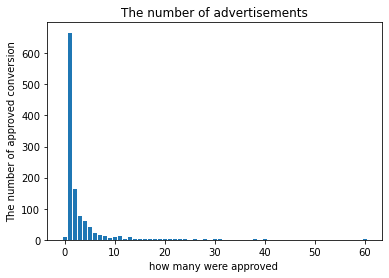

In [12]:
# Total number of people who enquired about the product after seeing the ad.
total_convert = conversion_data['Total_Conversion'].value_counts()
plt.bar(total_convert.index.values, total_convert.values)
plt.xlabel('how many were approved ')
plt.ylabel('The number of approved conversion')
plt.title('The number of advertisements')
plt.show();

In [27]:
#Approved_Conversion
Approved_Conversion = conversion_data['Approved_Conversion'].sum()
Approved_Conversion

1079

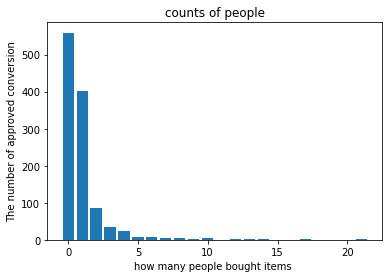

In [13]:
#  Total number of people who bought the product after seeing the ad.
Approved = conversion_data['Approved_Conversion'].value_counts()
plt.bar(Approved.index.values, Approved.values)
plt.xlabel('how many people bought items ')
plt.ylabel('The number of approved conversion')
plt.title('counts of people')
plt.show();